#  ATHARVA ANIL DAHOTRE 

# GRIP : THE SPARKS FOUNDATION# 

# Data Science and Business Analytics Intern


#  Task 2 : Prediction using Unsupervised ML
 

**Dataset used : Iris dataset, which is available in sklearn library**

**In this we have to predict the optimum number of clusters and represent it usually**

***Import required libraries***

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

***Read the Data***

In [2]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# dropping Id column

data.drop('Id',axis=1,inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
print(data.isnull().sum(), '\n\nNumber of duplicate rows:',data.duplicated().sum())     #check for nulls and duplicates

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows: 3


In [7]:
## drop duplicate rows

data.drop_duplicates(inplace=True)
data.shape[0]  #gives no. of rows. Similarly, data.shape[1] will give no. of columns

147

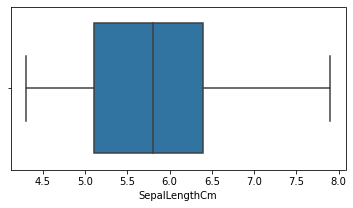

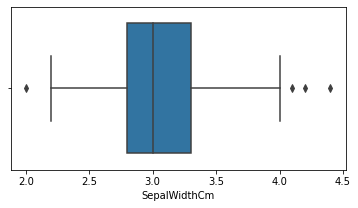

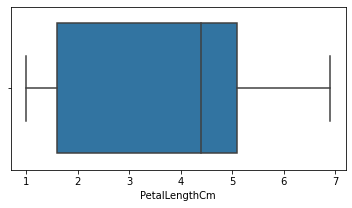

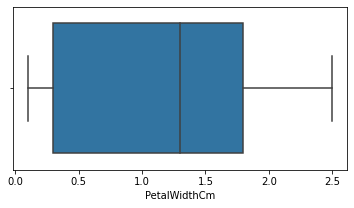

In [8]:
## Check for any outliers in the numeric data
for i in data.columns :
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

In [9]:
## Treating outliers present in the sepalwidthCm column

q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x :upper_fence if x>upper_fence
                                                 else lower_fence if x<lower_fence else x)

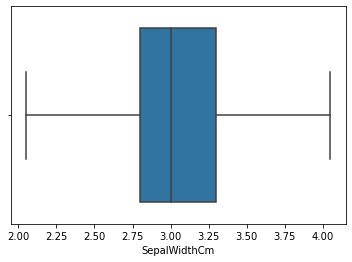

In [10]:
sns.boxplot(data['SepalWidthCm']);

***Understanding the Data***

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


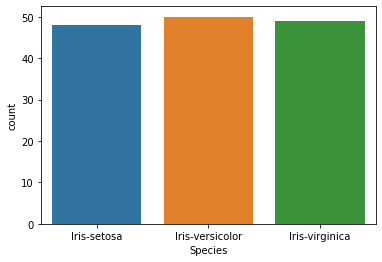

In [11]:
## Target Class

print(data.Species.value_counts())
sns.countplot(data.Species);

In [12]:
data.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [13]:
data.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

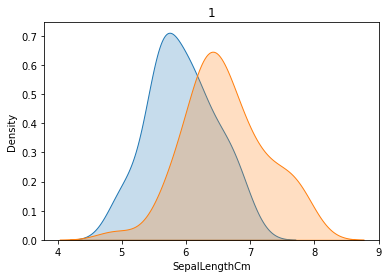

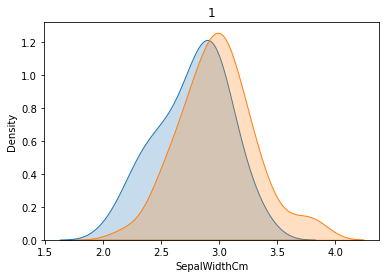

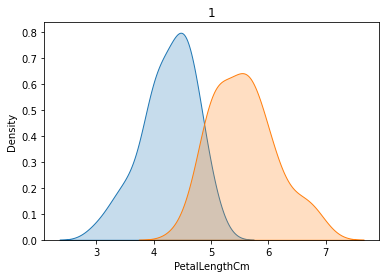

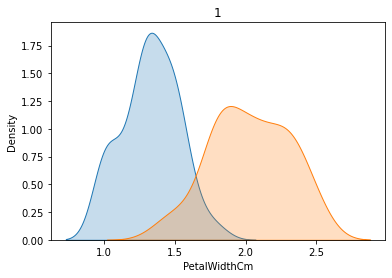

In [14]:
## Distribution of features by unique
for i in data.columns[:-1]:
    sns.kdeplot(data = data.loc[data.Species=='Iris-sentosa'][i], label='Iris-sentosa',shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label='Iris-versicolor',shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label='Iris-virginica',shade=True)
    
    plt.title(1);
    plt.show()

In [15]:
## Correlation Matrix

data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


<AxesSubplot:>

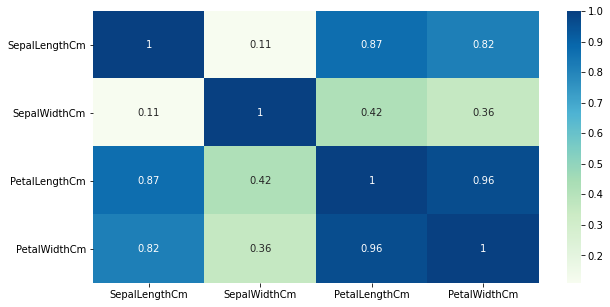

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu',annot=True)

***K-means Clustering***

In [18]:
from sklearn.cluster import KMeans

In [19]:
SSE =[]
for i in range(1,10):
    kmeans=KMeans(n_jobs = -1,n_clusters = i , init='k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

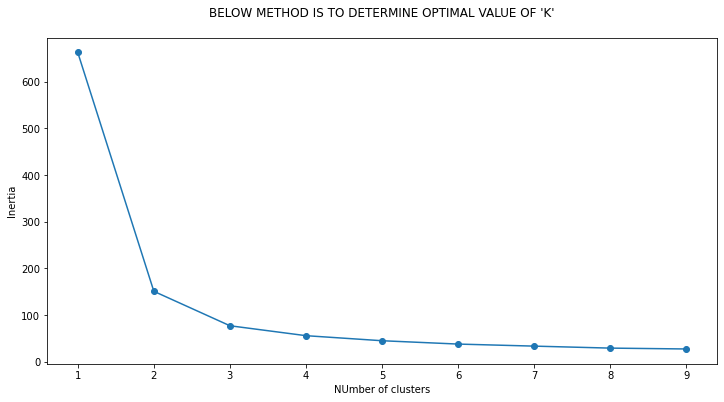

In [20]:
df=pd.DataFrame({"Cluster": range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['SSE'],marker='o')
plt.xlabel('NUmber of clusters')
plt.ylabel('Inertia')
plt.title("BELOW METHOD IS TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [21]:
kmeans=KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[6.43      , 2.94      , 4.59      , 1.435     ],
       [5.25555556, 3.65      , 1.5037037 , 0.28888889],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.70588235, 2.66470588, 3.95882353, 1.2       ],
       [6.04117647, 2.73529412, 5.02352941, 1.78823529],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.6952381 , 3.12380952, 1.40952381, 0.2       ],
       [5.        , 2.3125    , 3.275     , 1.025     ],
       [5.41428571, 2.75714286, 4.35714286, 1.41428571]])

In [22]:
kmeans.labels_

array([1, 6, 6, 6, 1, 1, 6, 1, 6, 6, 1, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 1, 6, 6, 1, 1, 1, 6, 6, 1, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 1, 6,
       1, 6, 1, 6, 0, 0, 0, 3, 0, 8, 0, 7, 0, 8, 7, 3, 3, 0, 3, 0, 8, 3,
       0, 3, 4, 3, 4, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 8, 0, 0, 0, 3, 3,
       8, 0, 3, 7, 8, 3, 3, 0, 7, 3, 2, 4, 5, 2, 2, 5, 8, 5, 2, 5, 2, 4,
       2, 4, 4, 2, 2, 5, 5, 4, 2, 4, 5, 4, 2, 5, 4, 4, 2, 5, 5, 5, 2, 4,
       4, 5, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4])

In [23]:
data['cluster'] = kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,6
2,4.7,3.2,1.3,0.2,Iris-setosa,6
3,4.6,3.1,1.5,0.2,Iris-setosa,6
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,4
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [24]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

1    27
2    22
6    21
0    20
3    17
4    17
5    12
8     7
7     4
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

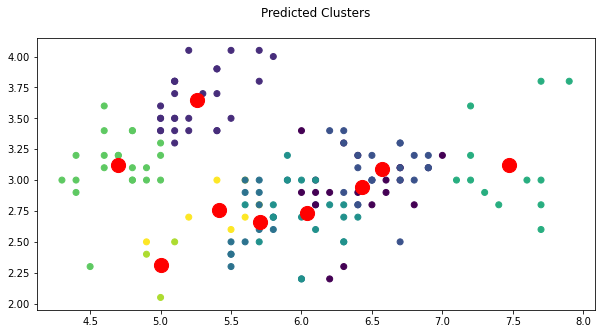

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'], c=data.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200,c='red', label = 'Centroids')
plt.show()

In [26]:
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts()

1    27
6    21
Name: cluster, dtype: int64

In [27]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()

0    20
3    17
8     6
7     4
4     3
Name: cluster, dtype: int64

In [28]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

2    22
4    14
5    12
8     1
Name: cluster, dtype: int64

In [29]:
data['Species_encoded']= data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,6,1
2,4.7,3.2,1.3,0.2,Iris-setosa,6,1
3,4.6,3.1,1.5,0.2,Iris-setosa,6,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,4,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [30]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        50
           1       1.00      0.56      0.72        48
           2       1.00      0.45      0.62        49
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.47       147
   macro avg       0.33      0.16      0.21       147
weighted avg       1.00      0.47      0.64       147



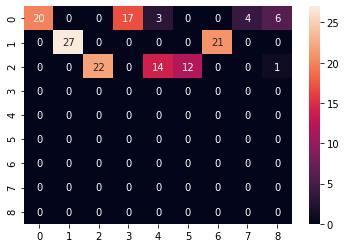

In [31]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']),annot=True);